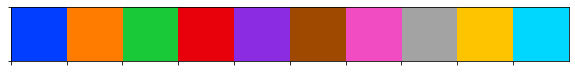

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/pcm-dpc/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 74240  100 74240    0     0  74240      0  0:00:01 --:--:--  0:00:01  221k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN
5,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148,NaN,NaN
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58,NaN,NaN
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124,NaN,NaN
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
deaths.set_index('data', inplace=True)
deaths.index = pd.to_datetime(deaths.index).date
tests.set_index('data', inplace=True)
tests.index = pd.to_datetime(tests.index).date

conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
2020-03-26,946,134,393,1310,10816,1223,2096,2567,34889,3114,...,906,1297,6534,1182,494,1164,3226,802,408,6935
2020-03-27,1017,151,494,1454,11588,1317,2295,2696,37298,3196,...,1003,1391,7092,1334,530,1250,3450,884,452,7497
2020-03-28,1133,182,555,1592,12383,1436,2505,2822,39415,3373,...,1109,1505,7671,1458,624,1359,3817,969,511,7930
2020-03-29,1293,202,614,1759,13119,1480,2706,3076,41007,3558,...,1214,1594,8206,1549,638,1460,4122,1023,584,8358
2020-03-30,1345,214,647,1952,13531,1501,2914,3217,42161,3684,...,1325,1682,8712,1712,682,1555,4412,1051,584,8724


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia         42161
Emilia-Romagna    13531
Veneto             8724
Piemonte           8712
Toscana            4412
Marche             3684
Liguria            3217
Lazio              2914
Campania           1952
Puglia             1712
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Abruzzo                   1345
Basilicata                 214
Calabria                   647
Campania                  1952
Emilia-Romagna           13531
Friuli Venezia Giulia     1501
Lazio                     2914
Liguria                   3217
Lombardia                42161
Marche                    3684
Molise                     134
P.A. Bolzano              1325
P.A. Trento               1682
Piemonte                  8712
Puglia                    1712
Sardegna                   682
Sicilia                   1555
Toscana                   4412
Umbria                    1051
Valle d'Aosta              584
Veneto                    8724
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

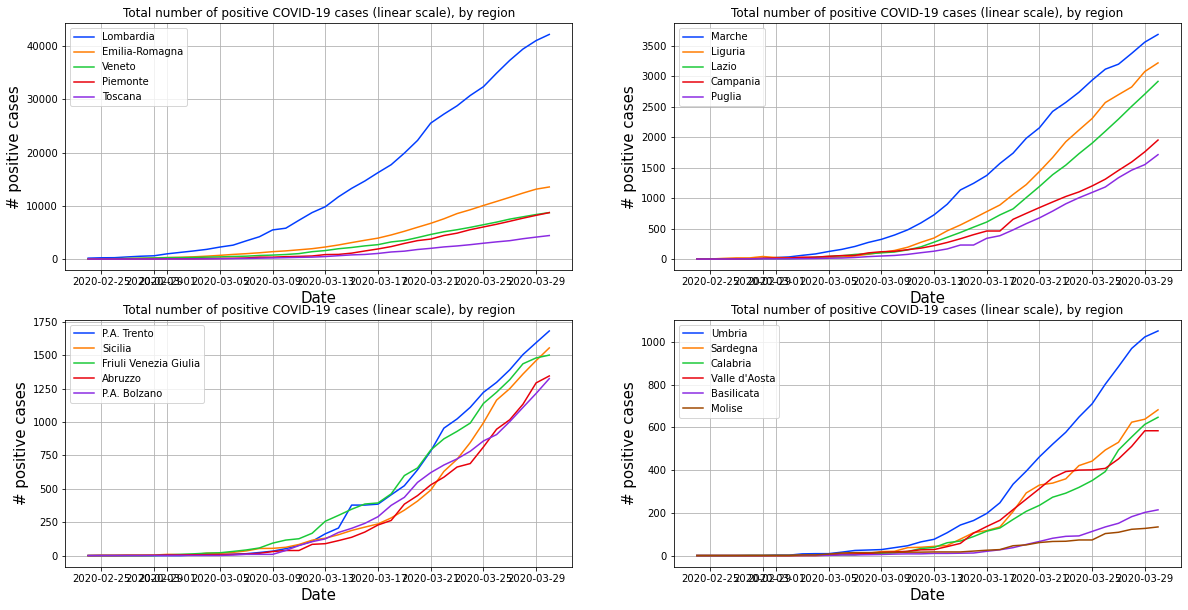

In [8]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        count+=1

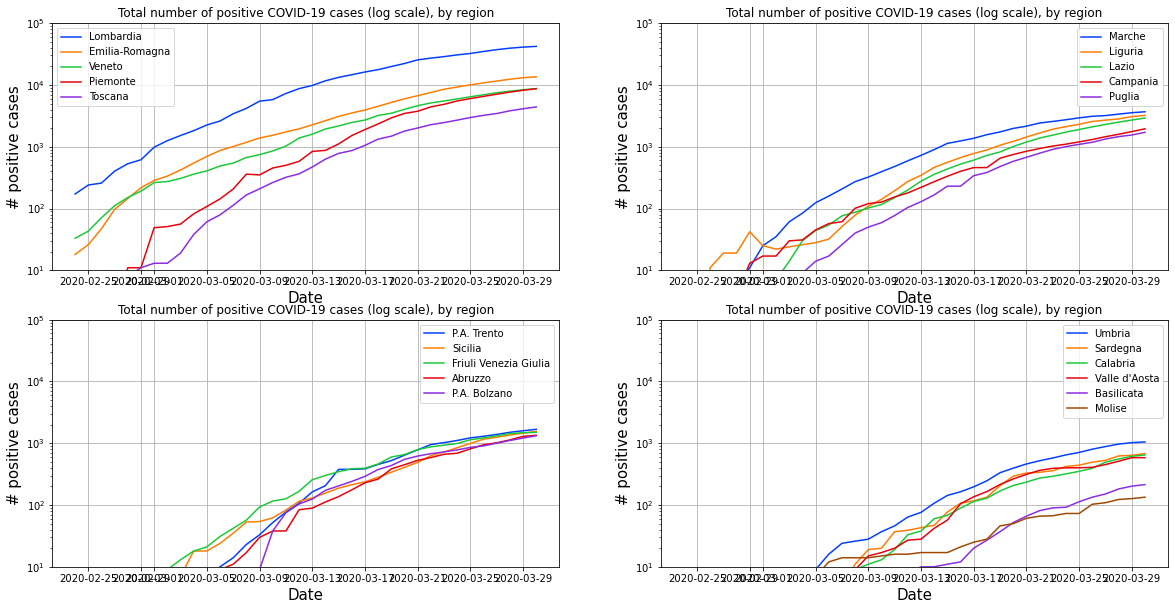

In [9]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        axes[r,c].set_ylim(1e1,1e5)
        count+=1

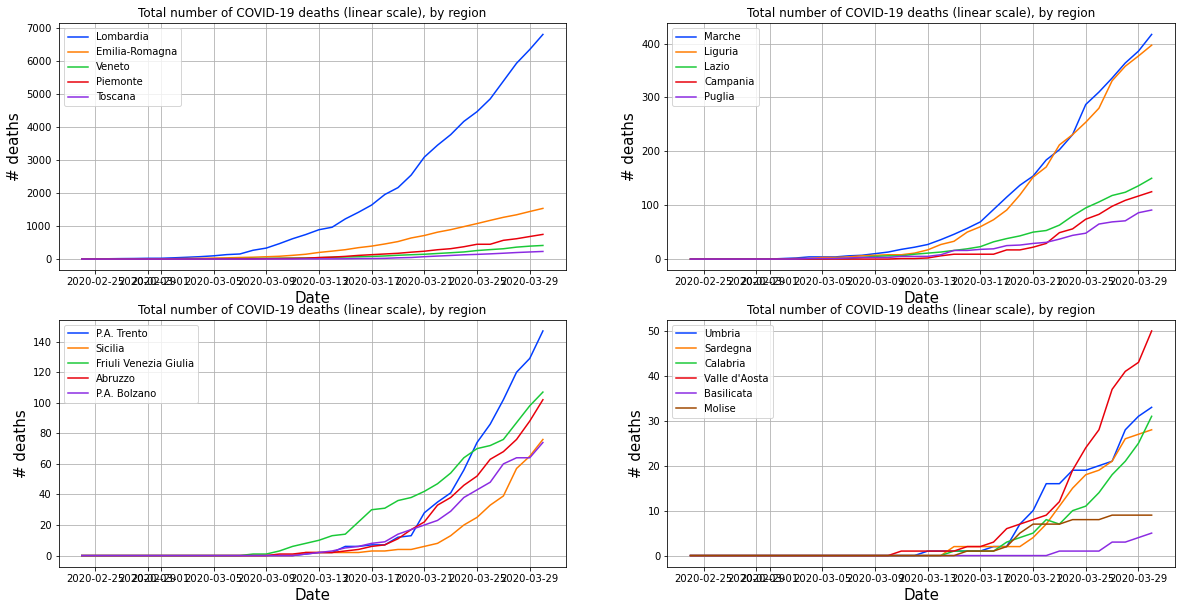

In [10]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        count+=1

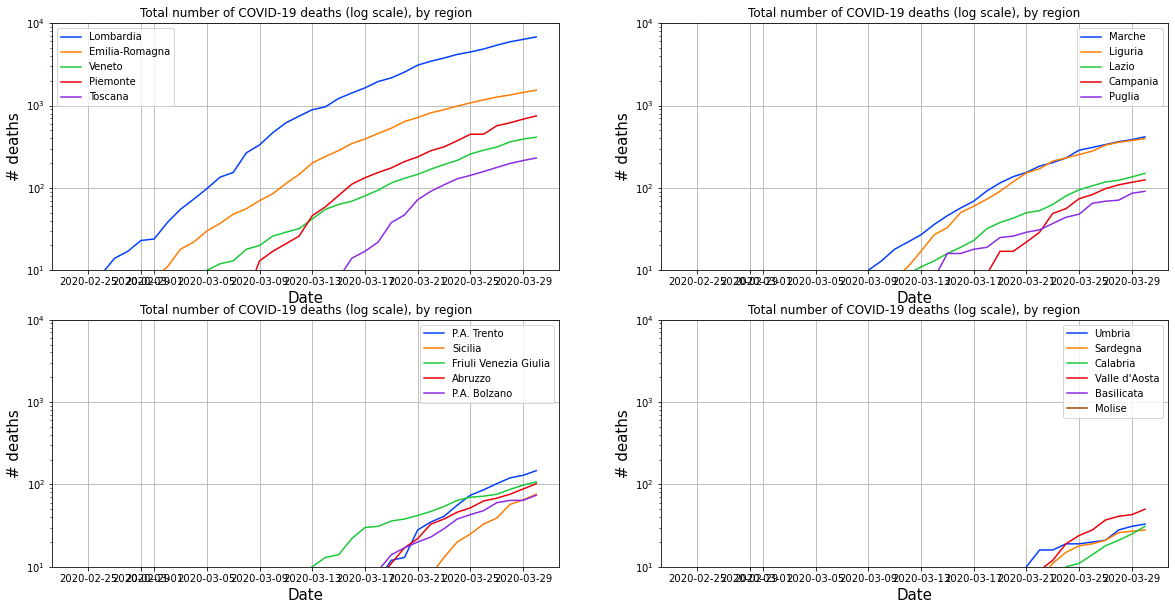

In [11]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        axes[r,c].set_ylim(1e1,1e4)
        count+=1

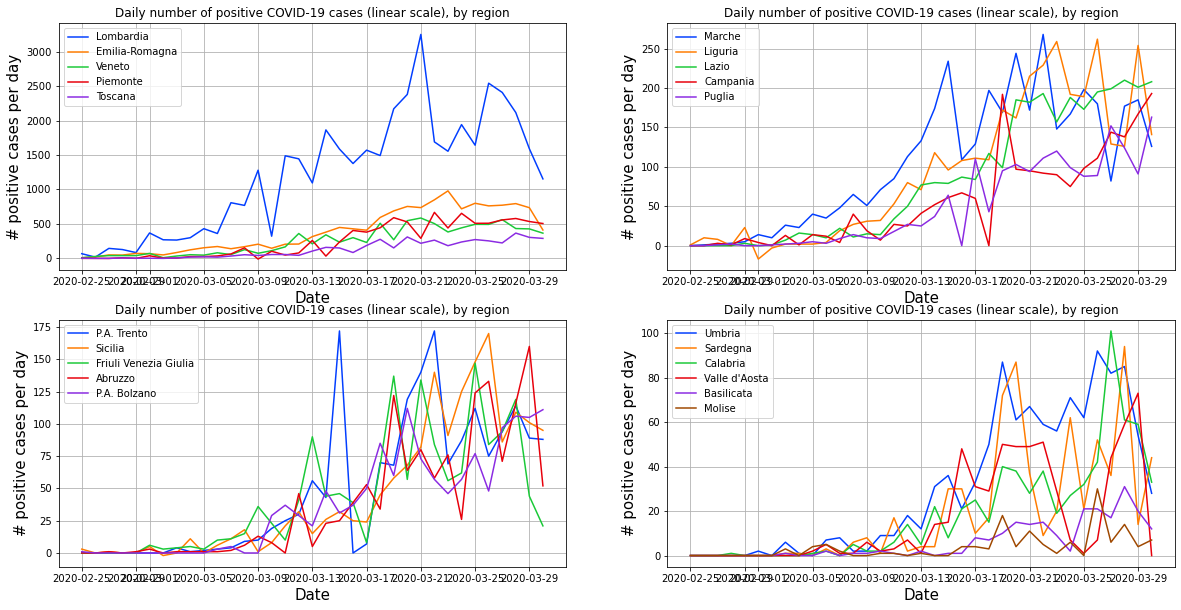

In [12]:
conf_daily = conf - conf.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases per day", fontsize=15)
        count+=1

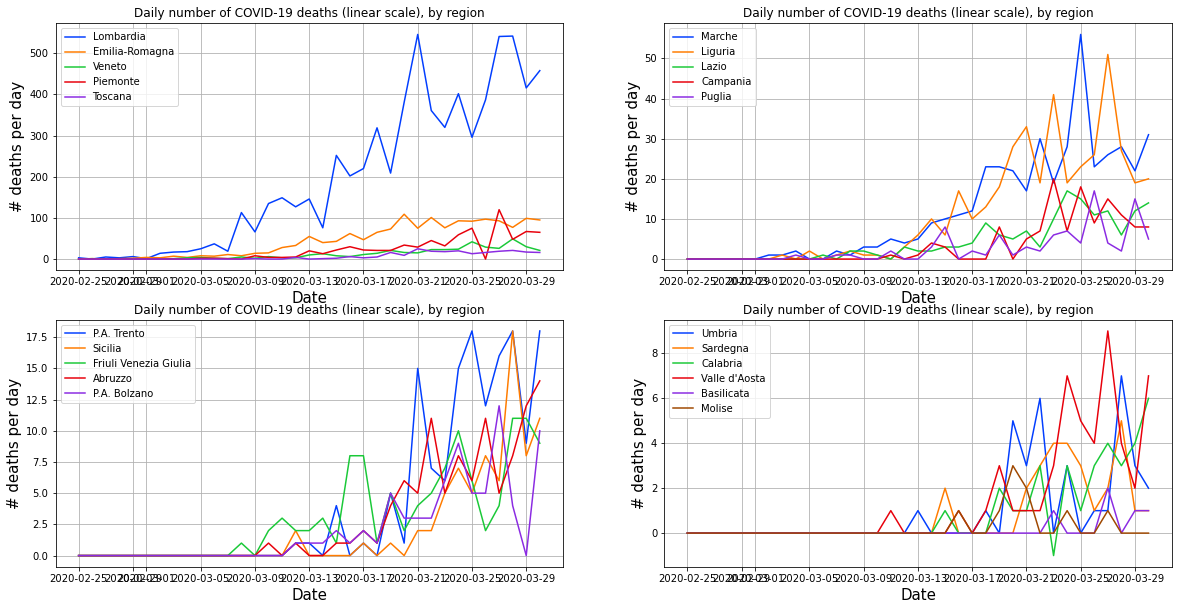

In [13]:
deaths_daily = deaths - deaths.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths per day", fontsize=15)
        count+=1

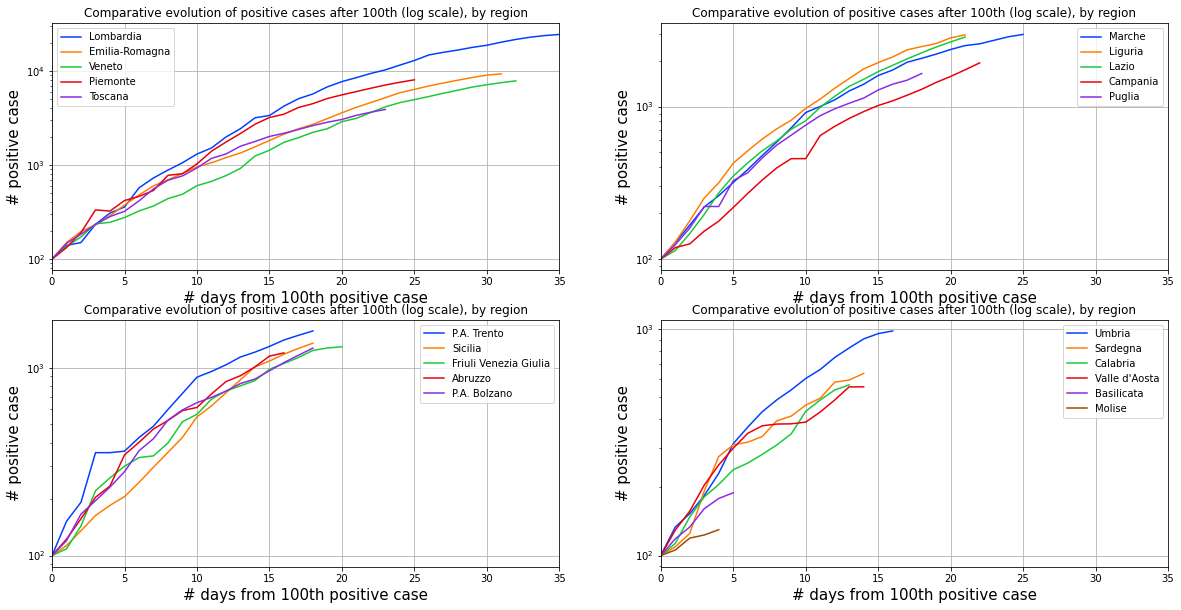

In [14]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 100th positive case", fontsize=15)
        axes[r,c].set_ylabel("# positive case", fontsize=15)
        axes[r,c].set_xlim(0,35)
        count+=1

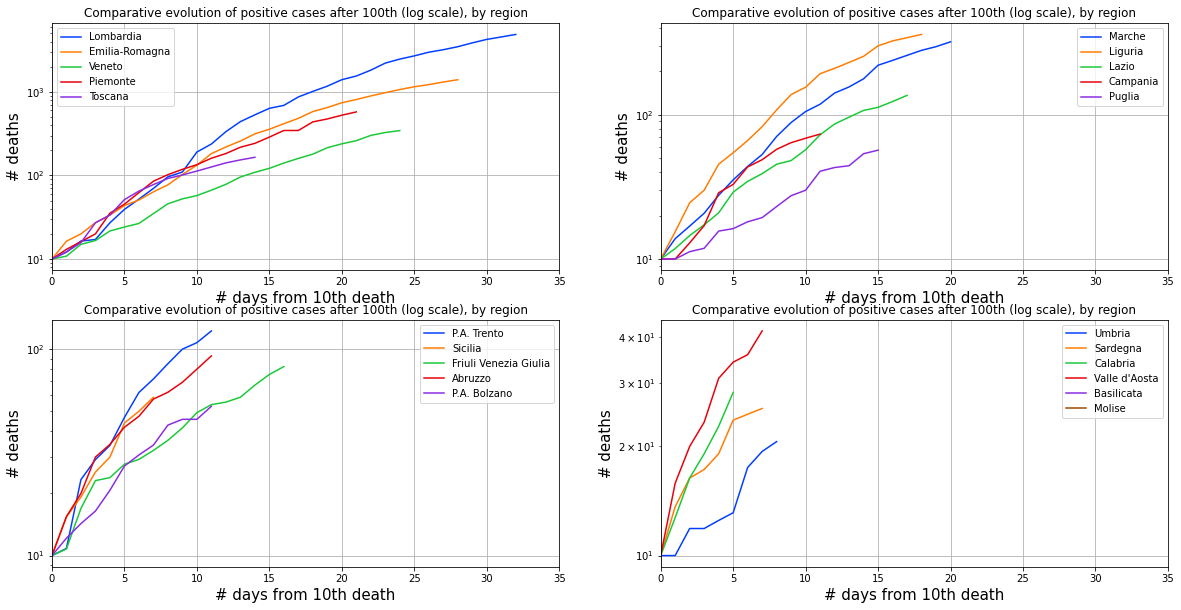

In [15]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 10th death", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        axes[r,c].set_xlim(0,35)
        count+=1

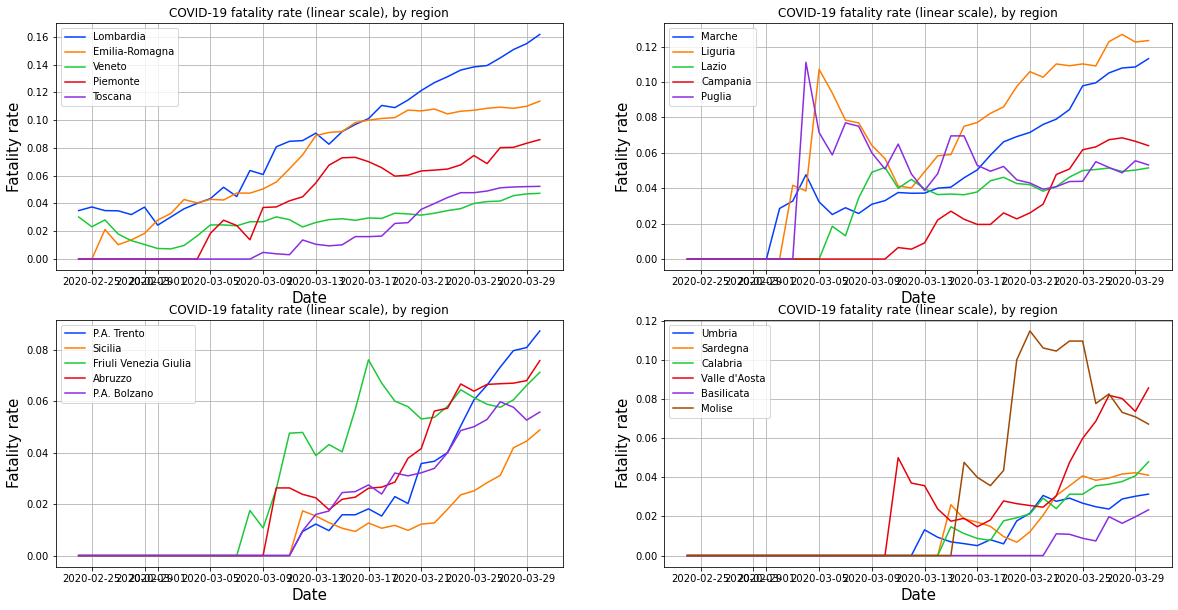

In [16]:
fatality = deaths.divide(conf.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        fatality[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='COVID-19 fatality rate (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Fatality rate", fontsize=15)
        # axes[r,c].set_ylim(0,0.12)
        count+=1

In [17]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [18]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [19]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [20]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Toscana,Umbria,Marche,Lazio,...,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,Emilia-Romagna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,3.76008e+06,917784,1.59126e+06,5.67948e+06,...,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN,NaN
2020-02-24,3,0,0,172,33,0,0,0,0,3,...,0,0,0,0,0,0,0,18.0,0.0,0.0
2020-02-25,3,0,1,240,43,0,2,0,0,3,...,0,0,0,0,0,3,0,26.0,1.0,0.0
2020-02-26,3,0,11,258,71,0,2,0,1,3,...,0,0,0,0,0,3,0,47.0,1.0,0.0
2020-02-27,2,0,19,403,111,0,2,0,3,3,...,0,3,1,0,0,4,0,97.0,1.0,0.0


In [21]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [22]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-03-26,14.8708,31.7105,15.9865,35.5743,13.9961,9.88662,8.57961,8.73844,19.5693,3.69048,7.19914,3.33369,2.24299,2.88966,2.3367,2.02935,2.25971,3.00975
2020-03-27,16.1408,35.1303,16.7899,38.0306,15.1303,10.6465,9.17534,9.6319,20.0846,4.04086,7.73946,3.52788,2.48955,3.26125,2.63315,2.55089,2.42667,3.22909
2020-03-28,17.4585,39.7158,17.5746,40.1892,16.0042,11.6085,10.1514,10.558,21.197,4.41061,8.62223,3.98101,2.72584,3.5644,3.17373,2.86588,2.63827,3.80179
2020-03-29,18.6762,45.3895,19.1564,41.8124,16.868,11.9642,10.9625,11.1464,22.3596,4.76452,9.83985,4.11047,3.01178,3.78687,3.52249,3.17054,2.83435,3.88709
2020-03-30,19.8278,45.3895,20.0345,42.9891,17.6066,12.134,11.7338,11.4515,23.1514,5.13075,10.2356,4.33703,3.34223,4.18536,3.73175,3.34095,3.01878,4.15516


KeyError: "['Emilia-Romagna'] not in index"

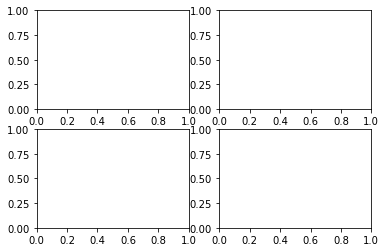

In [23]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        count+=1

In [ ]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (log scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        axes[r,c].set_ylim(1e-1,1e2)
        count+=1

In [ ]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        tests[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 tests (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# tests", fontsize=15)
        count+=1

In [ ]:
conf_per_test = conf_no_norm.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 per test (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# tests", fontsize=15)
        count+=1

In [ ]:
fatality_per_test = deaths.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        fatality_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Fatality rate of positive COVID-19 per test (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Fatality rate", fontsize=15)
        count+=1


In [ ]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

fatality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        fatality_after_7d_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Fatality rate of positive COVID-19 per test after 7 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Fatality rate", fontsize=15)
        axes[r,c].set_ylim(0,0.12)
        count+=1


In [ ]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

fatality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        fatality_after_14d_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Fatality rate of positive COVID-19 per test after 14 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Fatality rate", fontsize=15)
        axes[r,c].set_ylim(0,0.6)
        count+=1